### Problem Statement


Selling an airplane or a helicopter it seems like selling a car however since there are less people that own a plane because of the expensive price and the required space to keep the airplane / helicopter it become harder for people to predict the price of their aircraft, as there are many features that will define a price of an aircraft

### Project Goals 

This Project goals is to findout what are the factors that's affecting the price of an aircraft and after we found out we will build a machine learning model that's able to predict a price of an aircraft based on their features

In [150]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import sidetable as stb 

### Getting the basic Understanding of the data 

In [11]:
## there's some cleaning needs to be done like standardazing the currency
# location seems to have a  '\' we need to remove that to extract better information 
# and there are some nan column because some airplane doesn't have a multi engine piston or multi propeller

df = pd.read_csv('aircraft.csv')
df.head()

,Condition,Price,Currency,Category,Year,Make,Model,Location,S/N,REG,Total Hours,Engine 1 Hours,Engine 2 Hours,Prop 1 Hours,Prop 2 Hours,Total Seats,Flight Rules,National Origin
0,New,"$387,000",USD,Piston Helicopters,2020,ROBINSON HELICOPTER,R44 RAVEN I,FL\n\t USA,Not Listed,TBD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States
1,Used,"$294,900",USD,Single Engine Piston,2011,CIRRUS,SR20-G3,"Farmingdale (KFRG),\n\t ...",2081,N187PH,1740,1740 SNEW,NaN,1740 SNEW,NaN,NaN,NaN,United States
2,Used,"$184,900",USD,Single Engine Piston,2011,CUBCRAFTERS,CC11-160 CARBON CUB SS,"Louisburg,\n\t NC\n\...",CC11-00168,N160TJ,175,175 SNEW,NaN,160 SNEW,NaN,NaN,NaN,United States
3,Used,"$609,000",USD,Single Engine Piston,2015,CIRRUS,SR22-G5 TURBO,"Knoxville,\n\t TN\n\...",1119,N619MT,738,738 HOURS,NaN,738 HOURS,NaN,5.0,IFR,United States
4,Used,"$699,000",USD,Single Engine Piston,2016,BEECHCRAFT,G36 BONANZA,"Greensboro,\n\t NC\n...",E-4100,N71RW,175,175 SNEW,175 SNEW,NaN,NaN,6.0,NaN,United States


In [12]:
df.info()

# as we mention before there are a lot of missing value in this data 
# however we will not remove it straight away because we might remove a valuable information in the data
# a lot of data needs to be converted into int or float 
# we will do .describe after we clean the data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Condition        1761 non-null   object 
 1   Price            2530 non-null   object 
 2   Currency         1978 non-null   object 
 3   Category         2530 non-null   object 
 4   Year             2530 non-null   object 
 5   Make             2530 non-null   object 
 6   Model            2530 non-null   object 
 7   Location         2518 non-null   object 
 8   S/N              2527 non-null   object 
 9   REG              2528 non-null   object 
 10  Total Hours      2433 non-null   object 
 11  Engine 1 Hours   1582 non-null   object 
 12  Engine 2 Hours   381 non-null    object 
 13  Prop 1 Hours     1165 non-null   object 
 14  Prop 2 Hours     263 non-null    object 
 15  Total Seats      1152 non-null   float64
 16  Flight Rules     868 non-null    object 
 17  National Origi

In [13]:
## we will see the unique value inside of every row 

for column in df.columns :
    print(f'{column} : ')
    print(df[column].unique())
    print("")



Condition : 
['New' 'Used' 'Project' nan]

Price : 
['$387,000 ' '$294,900 ' '$184,900 ' ... 'Price: Â£36,000'
 'Price: â‚¬36,500' 'Price: Â£69,000']

Currency : 
['USD' 'EUR' 'CHF' 'CAD' 'GBP' nan]

Category : 
['Piston Helicopters' 'Single Engine Piston' 'Private Jets'
 'Turbine Helicopters' 'Multi Engine Piston' 'Turboprop'
 'Gliders | Sailplanes' 'Ultralight' 'Gyrocopter' 'Turboprops'
 'Military/Classic/Vintage' 'Single Piston' 'Twin Piston']

Year : 
['2020' '2011' '2015' '2016' '2017' '2018' '1980' '1981' '1983' '1984'
 '1944' '1945' '1946' '1948' '1949' '1950' '1951' '1952' '1953' '1956'
 '1957' '1959' '1964' '1965' '1966' '1967' '1968' '1969' '1970' '1972'
 '1973' '1974' '1975' '1976' '1977' '1978' '1979' '1985' '1986' '1988'
 '1990' '1992' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003'
 '2004' '2005' '2006' '2007' '2008' '2009' '2019' '1963' '2010' '2014'
 '2012' '1943' '1942' 'Not Listed' '2013' '1991' '1982' '1987' '1989'
 '1993' '1994' '1995' '1940' '1941' '1934' '

In [14]:
#we will see the number of missing value in each columns 
# we can see from here that many planes doesn't have engine hour 2 and proppeler 2 hours  
# we will try to drop as little column as possible since we only have around 2500 data

df.isna().sum() / len(df)

Condition          0.303953
Price              0.000000
Currency           0.218182
Category           0.000000
Year               0.000000
Make               0.000000
Model              0.000000
Location           0.004743
S/N                0.001186
REG                0.000791
Total Hours        0.038340
Engine 1 Hours     0.374704
Engine 2 Hours     0.849407
Prop 1 Hours       0.539526
Prop 2 Hours       0.896047
Total Seats        0.544664
Flight Rules       0.656917
National Origin    0.003162
dtype: float64

## Cleaning The Data

### Cleaning Price and Currency

In [15]:
# since i prefer working with lower case and under score compared to upper case and space we will convert the column name first 

df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['condition', 'price', 'currency', 'category', 'year', 'make', 'model',
       'location', 's/n', 'reg', 'total_hours', 'engine_1_hours',
       'engine_2_hours', 'prop_1_hours', 'prop_2_hours', 'total_seats',
       'flight_rules', 'national_origin'],
      dtype='object')

In [32]:
df['price'].str[0].unique()

array(['3', '2', '1', '6', '7', '5', '4', '8', '9', 'P', nan],
      dtype=object)

In [39]:
## lets start with standardizing the price column and the currency into USD first 
# replacing the '$' sign in the column
# replacing the coma into empty space as well
# there's column with price we will replace it as well
# index 2521 currency is USD

# df['price'] = df['price'].replace('$', 'Price: Â£', 'Price:', ',', 'NEW', '')
df['price'] = df['price'].str.replace('Price:  â‚¬','')
df['price'] = df['price'].str.replace('Price: Â£','')
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = df['price'].str.replace('NEW','')
df['price'] = df['price'].str.replace('NEW','')
df['price'] = df['price'].str.replace('Price: â‚¬','')
df['price'] = df['price'].str.replace('Price: USD','')
df['price'] = df['price'].str.replace('Price:','')
df['price'] = df['price'].str.strip()
df['price']

0       387000
1       294900
2       184900
3       609000
4       699000
         ...  
2525     36000
2526     36000
2527     36000
2528     36500
2529     69000
Name: price, Length: 2530, dtype: object

In [40]:
df[df['price'].str.isdigit() == False]

,condition,price,currency,category,year,make,model,location,s/n,reg,total_hours,engine_1_hours,engine_2_hours,prop_1_hours,prop_2_hours,total_seats,flight_rules,national_origin
2260,New,,NaN,Turboprops,2020,EPIC AIRCRAFT,E1000,"South America, Brazil",TBD07,-,-,NaN,NaN,NaN,NaN,NaN,NaN,United States


In [41]:
# as we can see from the above that there's is one value with missing price since price is our target column
# we are going to drop that
df.drop(df[df['price'] == ''].index, inplace = True)
df[df['price'].str.isdigit() == False]

,condition,price,currency,category,year,make,model,location,s/n,reg,total_hours,engine_1_hours,engine_2_hours,prop_1_hours,prop_2_hours,total_seats,flight_rules,national_origin


In [43]:
# now we have a clean price data we can convert it into int 
# now we have the column in integer value we can move forward
df['price'] = df['price'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2529 entries, 0 to 2529
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   condition        1760 non-null   object 
 1   price            2529 non-null   int32  
 2   currency         1978 non-null   object 
 3   category         2529 non-null   object 
 4   year             2529 non-null   object 
 5   make             2529 non-null   object 
 6   model            2529 non-null   object 
 7   location         2517 non-null   object 
 8   s/n              2526 non-null   object 
 9   reg              2527 non-null   object 
 10  total_hours      2432 non-null   object 
 11  engine_1_hours   1582 non-null   object 
 12  engine_2_hours   381 non-null    object 
 13  prop_1_hours     1165 non-null   object 
 14  prop_2_hours     263 non-null    object 
 15  total_seats      1152 non-null   float64
 16  flight_rules     868 non-null    object 
 17  national_origi

In [48]:
## now time to clean currency
# since there's nan value in the currency we will fill it with mode 
df['currency'] = df['currency'].fillna(df['currency'].mode()[0])
df['currency'].unique()


array(['USD', 'EUR', 'CHF', 'CAD', 'GBP'], dtype=object)

In [59]:
df.isna().sum()

condition           769
price                 0
currency              0
category              0
year                  0
make                  0
model                 0
location             12
s/n                   3
reg                   2
total_hours          97
engine_1_hours      947
engine_2_hours     2148
prop_1_hours       1364
prop_2_hours       2266
total_seats        1377
flight_rules       1661
national_origin       8
dtype: int64

In [56]:
print(df[df['currency'] == 'EUR']['price'].head(1))
print(df[df['currency'] == 'USD']['price'].head(1))
print(df[df['currency'] == 'CAD']['price'].head(1))
print(df[df['currency'] == 'CHF']['price'].head(1))
print(df[df['currency'] == 'GBP']['price'].head(1))

# this column is to make sure that the function done right

29    4500000
Name: price, dtype: int32
0    387000
Name: price, dtype: int32
357    95000
Name: price, dtype: int32
186    670000
Name: price, dtype: int32
1307    1495000
Name: price, dtype: int32


In [60]:
# now the currency is now standardize let's now convert all the price it into USD
# lets do it by making a function
# 1 euro = 1.19 dollar
# 1 chf = 1.11 dollar
# 1 cad = 0.77 dollar
# 1 GBP = 1.32 dollar

## all references are from google.com 

def money(row):
    if (row['currency'] == 'EUR'):
        return row['price'] * 1.19
    
    elif (row['currency'] == 'CHF'):
        return row['price'] * 1.11
    
    elif (row['currency'] == 'CAD'):
        return row['price'] * 0.77
    
    elif (row['currency'] == 'GBP'):
        return row['price'] * 1.32
    
    else:
        return row['price'] * 1
    
df['standard_price'] = df.apply(money, axis = 1)
df.head()



,condition,price,currency,category,year,make,model,location,s/n,reg,total_hours,engine_1_hours,engine_2_hours,prop_1_hours,prop_2_hours,total_seats,flight_rules,national_origin,standard_price
0,New,387000,USD,Piston Helicopters,2020,ROBINSON HELICOPTER,R44 RAVEN I,FL\n\t USA,Not Listed,TBD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,387000.0
1,Used,294900,USD,Single Engine Piston,2011,CIRRUS,SR20-G3,"Farmingdale (KFRG),\n\t ...",2081,N187PH,1740,1740 SNEW,NaN,1740 SNEW,NaN,NaN,NaN,United States,294900.0
2,Used,184900,USD,Single Engine Piston,2011,CUBCRAFTERS,CC11-160 CARBON CUB SS,"Louisburg,\n\t NC\n\...",CC11-00168,N160TJ,175,175 SNEW,NaN,160 SNEW,NaN,NaN,NaN,United States,184900.0
3,Used,609000,USD,Single Engine Piston,2015,CIRRUS,SR22-G5 TURBO,"Knoxville,\n\t TN\n\...",1119,N619MT,738,738 HOURS,NaN,738 HOURS,NaN,5.0,IFR,United States,609000.0
4,Used,699000,USD,Single Engine Piston,2016,BEECHCRAFT,G36 BONANZA,"Greensboro,\n\t NC\n...",E-4100,N71RW,175,175 SNEW,175 SNEW,NaN,NaN,6.0,NaN,United States,699000.0


In [62]:
df[df['currency'] == 'EUR'][['price', 'standard_price']].head(1)

,price,standard_price
29,4500000,5355000.0


In [63]:
4500000 * 1.19

# it seems that our function has done right by looking at one example now we can change all the currency into USD
# 

5355000.0

In [64]:
# now we have a single value for currency we can move on 
# we can also drop the price column since we have the standardize price column
df['currency'] = 'USD'
df['currency'].unique()

array(['USD'], dtype=object)

In [65]:
df = df.drop(columns = 'price')
df.head()

,condition,currency,category,year,make,model,location,s/n,reg,total_hours,engine_1_hours,engine_2_hours,prop_1_hours,prop_2_hours,total_seats,flight_rules,national_origin,standard_price
0,New,USD,Piston Helicopters,2020,ROBINSON HELICOPTER,R44 RAVEN I,FL\n\t USA,Not Listed,TBD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,387000.0
1,Used,USD,Single Engine Piston,2011,CIRRUS,SR20-G3,"Farmingdale (KFRG),\n\t ...",2081,N187PH,1740,1740 SNEW,NaN,1740 SNEW,NaN,NaN,NaN,United States,294900.0
2,Used,USD,Single Engine Piston,2011,CUBCRAFTERS,CC11-160 CARBON CUB SS,"Louisburg,\n\t NC\n\...",CC11-00168,N160TJ,175,175 SNEW,NaN,160 SNEW,NaN,NaN,NaN,United States,184900.0
3,Used,USD,Single Engine Piston,2015,CIRRUS,SR22-G5 TURBO,"Knoxville,\n\t TN\n\...",1119,N619MT,738,738 HOURS,NaN,738 HOURS,NaN,5.0,IFR,United States,609000.0
4,Used,USD,Single Engine Piston,2016,BEECHCRAFT,G36 BONANZA,"Greensboro,\n\t NC\n...",E-4100,N71RW,175,175 SNEW,175 SNEW,NaN,NaN,6.0,NaN,United States,699000.0


### Condition Missing Value 

In [72]:
## we will fill condition missing value with the mode of the column 

df['condition'] = df['condition'].fillna(df['condition'].mode()[0])
df.isna().sum()

condition             0
currency              0
category              0
year                  0
make                  0
model                 0
location             12
s/n                   3
reg                   2
total_hours          97
engine_1_hours      947
engine_2_hours     2148
prop_1_hours       1364
prop_2_hours       2266
total_seats        1377
flight_rules       1661
national_origin       8
standard_price        0
dtype: int64

### high missing value columns


looking at the condition above we see that there are huge amount of missing value in
- engine_1_hours  & 2
- and prop 1 and 2
- as well as total seats
- and flight rules

we are going to drop all this columns and i belive the prop hours and engine hours is represented with total hours 


In [73]:
df = df.drop(columns = ['engine_1_hours', 'engine_2_hours', 'prop_1_hours', 'prop_2_hours', 'total_seats'], axis = 1)
df.head()

,condition,currency,category,year,make,model,location,s/n,reg,total_hours,flight_rules,national_origin,standard_price
0,New,USD,Piston Helicopters,2020,ROBINSON HELICOPTER,R44 RAVEN I,FL\n\t USA,Not Listed,TBD,NaN,NaN,United States,387000.0
1,Used,USD,Single Engine Piston,2011,CIRRUS,SR20-G3,"Farmingdale (KFRG),\n\t ...",2081,N187PH,1740,NaN,United States,294900.0
2,Used,USD,Single Engine Piston,2011,CUBCRAFTERS,CC11-160 CARBON CUB SS,"Louisburg,\n\t NC\n\...",CC11-00168,N160TJ,175,NaN,United States,184900.0
3,Used,USD,Single Engine Piston,2015,CIRRUS,SR22-G5 TURBO,"Knoxville,\n\t TN\n\...",1119,N619MT,738,IFR,United States,609000.0
4,Used,USD,Single Engine Piston,2016,BEECHCRAFT,G36 BONANZA,"Greensboro,\n\t NC\n...",E-4100,N71RW,175,NaN,United States,699000.0


In [75]:
# fill in the condition missing value
# since the condition is 
# forget to drop flight rules let's drop it 
df = df.drop(columns = 'flight_rules')
df.isna().sum()

condition           0
currency            0
category            0
year                0
make                0
model               0
location           12
s/n                 3
reg                 2
total_hours        97
national_origin     8
standard_price      0
dtype: int64

In [77]:
# since we cannot assume location of the plane that's sold lets drop the missing value 
# some of the row can be filled however due to time constraint i'm going to drop it 

df = df.dropna()
df.isna().sum()


condition          0
currency           0
category           0
year               0
make               0
model              0
location           0
s/n                0
reg                0
total_hours        0
national_origin    0
standard_price     0
dtype: int64

In [80]:
# now since we don't have any more missing value let's change all the data type into  the type that we want


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2411 entries, 1 to 2529
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   condition        2411 non-null   object 
 1   currency         2411 non-null   object 
 2   category         2411 non-null   object 
 3   year             2411 non-null   object 
 4   make             2411 non-null   object 
 5   model            2411 non-null   object 
 6   location         2411 non-null   object 
 7   s/n              2411 non-null   object 
 8   reg              2411 non-null   object 
 9   total_hours      2411 non-null   object 
 10  national_origin  2411 non-null   object 
 11  standard_price   2411 non-null   float64
dtypes: float64(1), object(11)
memory usage: 244.9+ KB


In [89]:
# changing year from object into numeric
# however there's some columns that's not listed we're going to drop these 
# df['year'] = df['year'].astype('int')
df[df['year'] == 'Not Listed']

,condition,currency,category,year,make,model,location,s/n,reg,total_hours,national_origin,standard_price
197,Used,USD,Multi Engine Piston,Not Listed,LOCKWOOD AIRCRAFT,AIRCAM,"Punta Gorda,\n\t FL\...",AC-148,N612WF,725,United States,229000.0
1233,Used,USD,Single Engine Piston,Not Listed,BEDECORP,BD-4,"Augusta,\n\t ME\n\t ...",Not Listed,N602AD,20,United States,18000.0
1234,New,USD,Single Engine Piston,Not Listed,BEDECORP,BD-4,"Sacramento,\n\t CA\n...",BD4C020,Not Listed,0,United States,47000.0
1236,Used,USD,Private Jets,Not Listed,BOEING,727,"Hollister,\n\t CA\n\...",Not Listed,Not Listed,12000,United States,2000000.0
1239,Used,USD,Single Engine Piston,Not Listed,CESSNA,T210N,"Pembroke Pines (KHWO),\n\t ...",21063289,N5154A,5199,United States,179900.0
1240,Used,USD,Single Engine Piston,Not Listed,CESSNA,TR182RG SKYLANE,"Iowa City,\n\t IA\n\...",Not Listed,Not Listed,2870,United States,100000.0
1241,Used,USD,Single Engine Piston,Not Listed,CIRRUS,SR22,"Phillipsburg,\n\t OH...",955,N76SA,1600,United States,499900.0
1242,Used,USD,Single Engine Piston,Not Listed,CIRRUS,SR22,"Phillipsburg,\n\t OH...",1994,N75SA,725,United States,539900.0
1243,Used,USD,Single Engine Piston,Not Listed,DEHAVILLAND,DHC-2 MK I,"South St Paul,\n\t M...",899,N90663,8095,Canada,565000.0
1244,Used,USD,Turboprop,Not Listed,DEHAVILLAND,DHC-6-300,MT\n\t USA,119,N323SJ,28958,Canada,2750000.0


In [91]:
df.drop(df[df['year'] == 'Not Listed'].index, inplace = True)
df.drop(df[df['year'] == '-'].index, inplace = True)
df['year'] = df['year'].astype('int')

In [95]:
## now cleaning the total hours
# we see that in total hours the data is not cleaned as well



,condition,currency,category,year,make,model,location,s/n,reg,total_hours,national_origin,standard_price
1,Used,USD,Single Engine Piston,2011,CIRRUS,SR20-G3,"Farmingdale (KFRG),\n\t ...",2081,N187PH,1740,United States,294900.0
2,Used,USD,Single Engine Piston,2011,CUBCRAFTERS,CC11-160 CARBON CUB SS,"Louisburg,\n\t NC\n\...",CC11-00168,N160TJ,175,United States,184900.0
3,Used,USD,Single Engine Piston,2015,CIRRUS,SR22-G5 TURBO,"Knoxville,\n\t TN\n\...",1119,N619MT,738,United States,609000.0
4,Used,USD,Single Engine Piston,2016,BEECHCRAFT,G36 BONANZA,"Greensboro,\n\t NC\n...",E-4100,N71RW,175,United States,699000.0
5,Used,USD,Single Engine Piston,2016,BEECHCRAFT,G36 BONANZA,"Indianapolis,\n\t IN...",Not Listed,N686AG,250,United States,749000.0


In [125]:
## that's a lot of data to clean 

df['total_hours'] = df['total_hours'].str.replace(' SMOH','')
df['total_hours'] = df['total_hours'].str.replace(' HOURS','')
df['total_hours'] = df['total_hours'].str.replace(' SNEW','')
df['total_hours'] = df['total_hours'].str.replace(' SFRM','')
df.drop(df[df['total_hours'] == '12Yrs/2200HrsRemaining'].index, inplace = True)
df['total_hours'] = df['total_hours'].str.replace(',','')
df['total_hours'] = df['total_hours'].str.replace('.','')
df['total_hours'] = df['total_hours'].str.replace(':57','')
df['total_hours'] = df['total_hours'].str.replace('hrs','')
df['total_hours'] = df['total_hours'].str.replace(' hours since new','')
df['total_hours'] = df['total_hours'].str.replace('ours','')


df['total_hours'] = df['total_hours'].astype('float')

In [126]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2308 entries, 1 to 2527
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   condition        2308 non-null   object 
 1   currency         2308 non-null   object 
 2   category         2308 non-null   object 
 3   year             2308 non-null   int32  
 4   make             2308 non-null   object 
 5   model            2308 non-null   object 
 6   location         2308 non-null   object 
 7   s/n              2308 non-null   object 
 8   reg              2308 non-null   object 
 9   total_hours      2308 non-null   float64
 10  national_origin  2308 non-null   object 
 11  standard_price   2308 non-null   float64
dtypes: float64(2), int32(1), object(9)
memory usage: 225.4+ KB


## Now since we already have the data in the type that we want lets look at the outliers

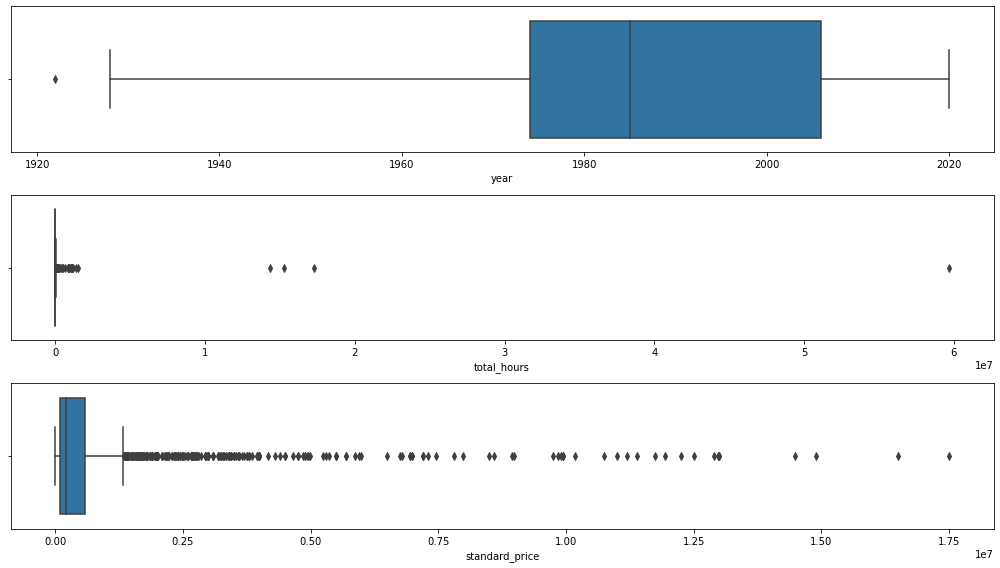

In [129]:
# using boxplot to look at the outliers 

plt.figure(figsize = (14 , 8 ))
x = 1

for column in df.describe().columns:
    plt.subplot(3,1,x)
    sns.boxplot(df[column])
    x+=1
    
plt.tight_layout()

# as we can see below that there are many outliers in total hours 
# and in the prices columns we will re catogrize those 2 columns 



In [130]:
df.describe()

,year,total_hours,standard_price
count,2308.000000,2.308000e+03,2.308000e+03
mean,1987.526863,5.956042e+04,7.112077e+05
std,20.810426,1.366667e+06,1.551365e+06
min,1922.000000,0.000000e+00,4.000000e+03
25%,1974.000000,1.193500e+03,9.675000e+04
50%,1985.000000,3.232000e+03,2.130100e+05
75%,2006.000000,5.844750e+03,5.890125e+05
max,2020.000000,5.967520e+07,1.750000e+07


### Recategorizing the total hours column

In [131]:
bin_total_hours = [-1, 1000, 2000, 4000, 10000, df['total_hours'].max()]
label_hour = ['upto 1000 hours', 'upto 2000 hours', 'upto 4000 hours', 'upto 10000 hours', 'more than 10000 hours']

df['hour'] = pd.cut(df['total_hours'], bins = bin_total_hours, labels = label_hour )
df.isna().sum()

# using df.isna making sure all value are recategorize perfectly

condition          0
currency           0
category           0
year               0
make               0
model              0
location           0
s/n                0
reg                0
total_hours        0
national_origin    0
standard_price     0
hour               0
dtype: int64

In [132]:
df.head()

,condition,currency,category,year,make,model,location,s/n,reg,total_hours,national_origin,standard_price,hour
1,Used,USD,Single Engine Piston,2011,CIRRUS,SR20-G3,"Farmingdale (KFRG),\n\t ...",2081,N187PH,1740.0,United States,294900.0,upto 2000 hours
2,Used,USD,Single Engine Piston,2011,CUBCRAFTERS,CC11-160 CARBON CUB SS,"Louisburg,\n\t NC\n\...",CC11-00168,N160TJ,175.0,United States,184900.0,upto 1000 hours
3,Used,USD,Single Engine Piston,2015,CIRRUS,SR22-G5 TURBO,"Knoxville,\n\t TN\n\...",1119,N619MT,738.0,United States,609000.0,upto 1000 hours
4,Used,USD,Single Engine Piston,2016,BEECHCRAFT,G36 BONANZA,"Greensboro,\n\t NC\n...",E-4100,N71RW,175.0,United States,699000.0,upto 1000 hours
5,Used,USD,Single Engine Piston,2016,BEECHCRAFT,G36 BONANZA,"Indianapolis,\n\t IN...",Not Listed,N686AG,250.0,United States,749000.0,upto 1000 hours


In [140]:
## standard price column

bin_price = [df['standard_price'].min(), 100000, 250000, 500000, 1000000, 2000000, df['standard_price'].max()]
label_price = ['upto 100000', 'upto 250000', 'upto 500000 hours', 'upto 1000000 hours', 'upto 2000000', 'more than 2000000']

df['price'] = pd.cut(df['standard_price'], bins = bin_price, labels = label_price )



### Now all the column has been recategorize  we can Do EDA

## EDA

### Univariate

In [155]:
df.describe()

# the newest plane for this dataset is from 2020
# the median prices for the airplace is around 213.000 USD
# the median total_hours of the plane that's listed is around 3200 hours 

,year,total_hours,standard_price
count,2307.000000,2.307000e+03,2.307000e+03
mean,1987.518856,5.958622e+04,7.115143e+05
std,20.811381,1.366963e+06,1.551632e+06
min,1922.000000,0.000000e+00,6.000000e+03
25%,1974.000000,1.194000e+03,9.750000e+04
50%,1985.000000,3.234000e+03,2.130100e+05
75%,2006.000000,5.845500e+03,5.890250e+05
max,2020.000000,5.967520e+07,1.750000e+07


In [145]:
df.columns

Index(['condition', 'currency', 'category', 'year', 'make', 'model',
       'location', 's/n', 'reg', 'total_hours', 'national_origin',
       'standard_price', 'hour', 'price'],
      dtype='object')

In [144]:
## condition of the airplane 

df['condition'].value_counts(normalize = True)

# we can see from all the airplane in this list are mostly used airplane
# there 2 small category of new airplane and project airplane


Used       0.989597
New        0.008669
Project    0.001734
Name: condition, dtype: float64

In [149]:
df['category'] = df['category'].str.replace('Turbopropss', 'Turboprops')
df['category'] = df['category'].str.replace('Single Piston', 'Single Engine Piston')

df['category'].value_counts(normalize = True)

# those category actually are the same so i recategorize it
# the majority of the plane here are single engine piston 
# ultralight plane is the least popular plane in this category maybe because it could only fit 1 people 

Single Engine Piston        0.559168
Multi Engine Piston         0.115301
Private Jets                0.107065
Turboprops                  0.079757
Turbine Helicopters         0.077156
Piston Helicopters          0.043346
Twin Piston                 0.011270
Military/Classic/Vintage    0.003468
Gyrocopter                  0.001734
Gliders | Sailplanes        0.000867
Ultralight                  0.000867
Name: category, dtype: float64

In [152]:
df.stb.freq(['year'], cum_cols=False).sort_values('percent', ascending = False)[0:11]

# there are more than 400 planes from the 1970's  in the top 10 year of the plane
# might be good idea to recategorize it to get a better insight or mahine learning

,year,count,percent
0,1979,85,3.684439
1,1978,82,3.554400
2,1977,81,3.511053
3,2007,74,3.207629
4,1981,74,3.207629
5,1980,64,2.774166
6,2008,61,2.644127
7,2006,59,2.557434
8,1975,58,2.514088
9,1974,56,2.427395


In [160]:
df.stb.freq(['make'], cum_cols=False)[0:6]

#Cessna, piper, and BeechCraft make 50% of the popuplation of this airplane in the dataset 
# this also a good idea to recategorize it 

,make,count,percent
0,CESSNA,539,23.363676
1,PIPER AIRCRAFT,346,14.997833
2,BEECHCRAFT,264,11.443433
3,CIRRUS,178,7.715648
4,ROBINSON HELICOPTER,98,4.247941
5,BELL TEXTRON,73,3.164283


In [157]:
# national origin
def country(row):
    if (row['national_origin'] == 'United States'):
        return 'USA'
    else :
        return 'Other'
    
df['country'] = df.apply(country, axis = 1)

df.stb.freq(['national_origin'], cum_cols=False)

#84 percent of the data is from united states i will recategorize it into united staes and other

,national_origin,count,percent
0,United States,1936,83.918509
1,Canada,79,3.424361
2,EU,55,2.384049
3,Italy,38,1.647161
4,France,36,1.560468
5,Czech Republic,30,1.300390
6,Germany,25,1.083658
7,Brazil,24,1.040312
8,Soviet Union,12,0.520156
9,AUSTRIA,12,0.520156


In [161]:
df.stb.freq(['country'], cum_cols=False)
# only 18 percent of the plane are not from USA

,country,count,percent
0,USA,1936,83.918509
1,Other,371,16.081491


In [163]:
df.stb.freq(['hour'], cum_cols = False)

# majority of the airplanes has 4000 - 10000 hours clocked in 
# while there are only 9 percent  of airplane that's over 10000 hour

,hour,count,percent
0,upto 10000 hours,740,32.076290
1,upto 4000 hours,511,22.149978
2,upto 1000 hours,499,21.629822
3,upto 2000 hours,339,14.694408
4,more than 10000 hours,218,9.449502


In [165]:
df.stb.freq(['price'], cum_cols = False)

## airplane from 100.000 to 250.000 are the most popular airplane in this dataset

,price,count,percent
0,upto 250000,671,29.085392
1,upto 100000,609,26.397919
2,upto 500000 hours,387,16.775033
3,upto 1000000 hours,264,11.443433
4,upto 2000000,190,8.235804
5,more than 2000000,186,8.062419


### Multivariate Analysis

In [167]:
df.columns

# since we're trying to define what are the factor that's affecting the price of an airplane we will focus on that

Index(['condition', 'currency', 'category', 'year', 'make', 'model',
       'location', 's/n', 'reg', 'total_hours', 'national_origin',
       'standard_price', 'hour', 'price', 'country'],
      dtype='object')

In [174]:
## price and condition of the airplane 

df.groupby('condition')['standard_price'].median().sort_values(ascending = False)

# from this dataset the median price of a used airplane is still more expensive compared to the new one 

condition
Used       214900.0
New        193887.0
Project     52600.0
Name: standard_price, dtype: float64

In [177]:
# which company airplace has the highest median price 

df.groupby('make')['standard_price'].median().sort_values(ascending = False)[0:11]

# we can see that the most popular airplane in this dataset is not one of the 10 highest median price

make
Bombardier Global         13000000.0
Bombardier Challenger      9800000.0
MESSERSCHMITT              5355000.0
MIKOYAN                    4650000.0
DASSAULT AVIATION          3995000.0
Honda Aircraft Company     3700000.0
GULFSTREAM AIRSPACE        3547500.0
CHANCE VOUGHT              3450000.0
PILATUS                    3399000.0
AIRBUS                     2755400.0
LET KUNOVICE               2650000.0
Name: standard_price, dtype: float64

In [179]:
## does plane from the united states are more expensive compared to other plane 

df.groupby('country')['standard_price'].median()

# apperently the median of the price of the plane from the united states are way lower compared to the rest of the world 

country
Other    594000.0
USA      189900.0
Name: standard_price, dtype: float64

In [184]:
# hour and prices 

df.groupby('hour')['standard_price'].median().sort_values(ascending = False)

# we can see it from here it seems that plane that has less hours are not more expensive 
# plane that has the highest hour has the highest median price compared to other group 

hour
more than 10000 hours    503600.0
upto 2000 hours          299000.0
upto 1000 hours          296372.0
upto 10000 hours         159925.0
upto 4000 hours          150000.0
Name: standard_price, dtype: float64

In [187]:
df.groupby('category')['standard_price'].median().sort_values()

# as we can see from here airplane that has the highest median price is private jets 
# while gyrocopter has the lowest median price 

category
Gyrocopter                    87650.0
Single Engine Piston         125250.0
Ultralight                   165850.0
Multi Engine Piston          169000.0
Military/Classic/Vintage     202300.0
Twin Piston                  205100.0
Gliders | Sailplanes         211550.0
Piston Helicopters           244500.0
Turbine Helicopters          874825.0
Turboprops                  1050000.0
Private Jets                1900000.0
Name: standard_price, dtype: float64

### Visualization

In [191]:
df.columns

Index(['condition', 'currency', 'category', 'year', 'make', 'model',
       'location', 's/n', 'reg', 'total_hours', 'national_origin',
       'standard_price', 'hour', 'price', 'country'],
      dtype='object')

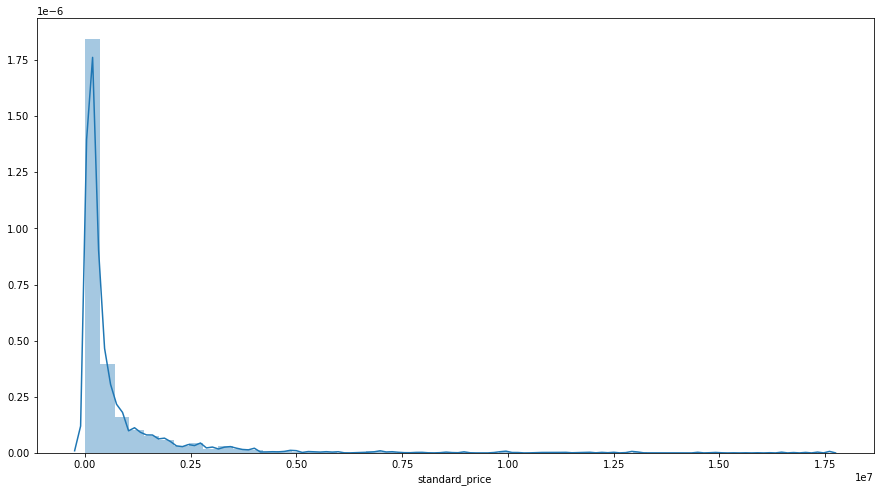

In [190]:
## target distribution 
plt.figure(figsize = (15, 8))

sns.distplot(df['standard_price'])

# we can see from here that the price data is right skewed 
# might be good idea to log it before processing it into machine learning later 

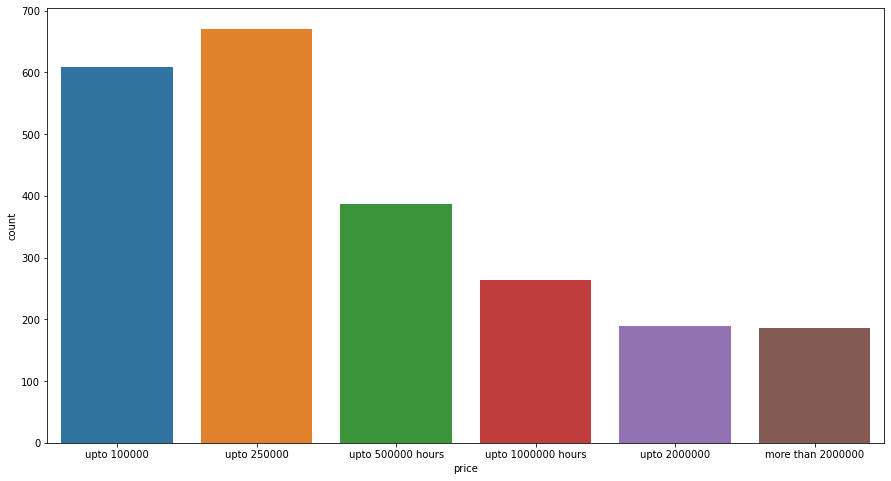

In [194]:
plt.figure(figsize = (15, 8))

sns.countplot(df['price'])

# from here we can see there are less airplanes when the prices is going higher after 250000

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

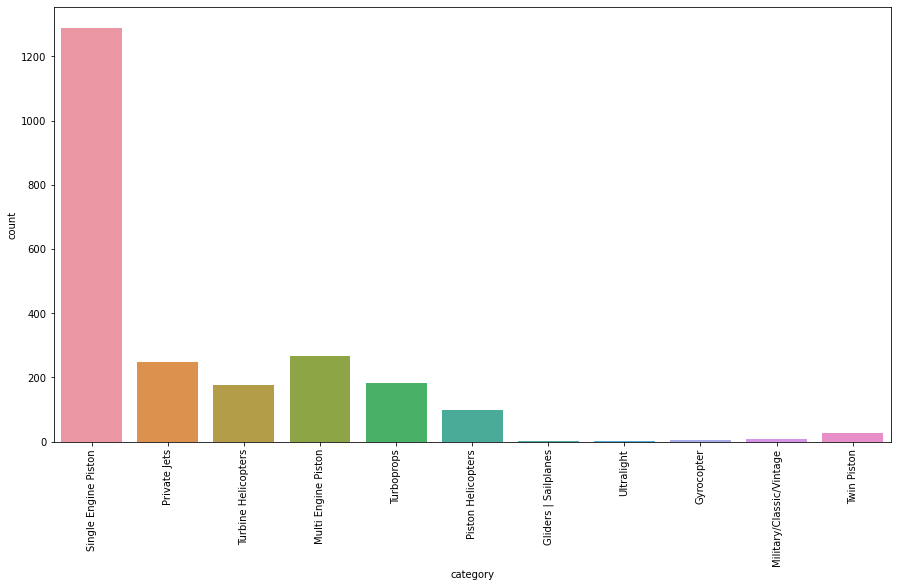

In [197]:
plt.figure(figsize = (15, 8))

sns.countplot(df['category'])
plt.xticks(rotation = 90)

# we can see that there are only few samples of gliders, ultralight, and gyrocopter

### MultiVariate

In [199]:
df.columns

Index(['condition', 'currency', 'category', 'year', 'make', 'model',
       'location', 's/n', 'reg', 'total_hours', 'national_origin',
       'standard_price', 'hour', 'price', 'country'],
      dtype='object')

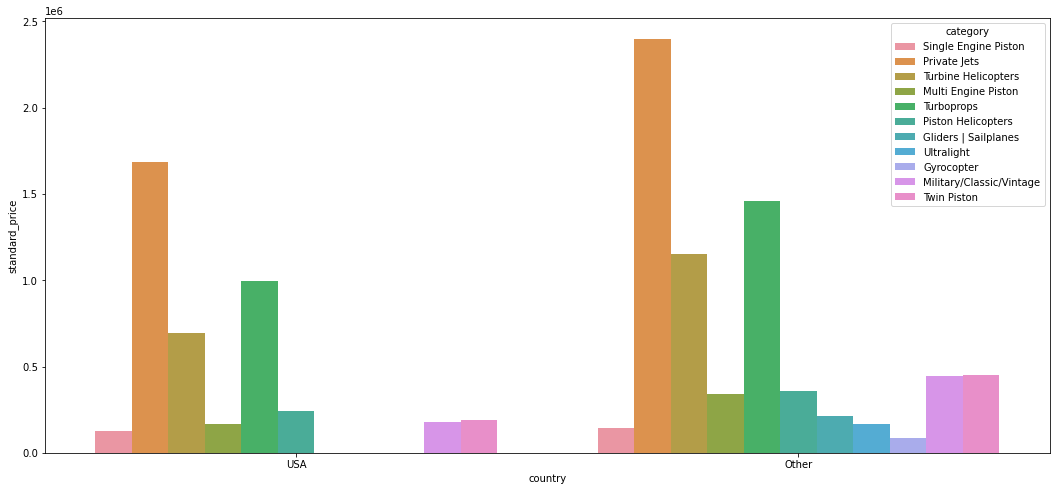

In [206]:
plt.figure(figsize = (18, 8))

sns.barplot(df['country'], df['standard_price'], estimator = np.median, hue = df['category'], ci = False)

## we can see from the column below that plane that's not from the us are more expensive in every category

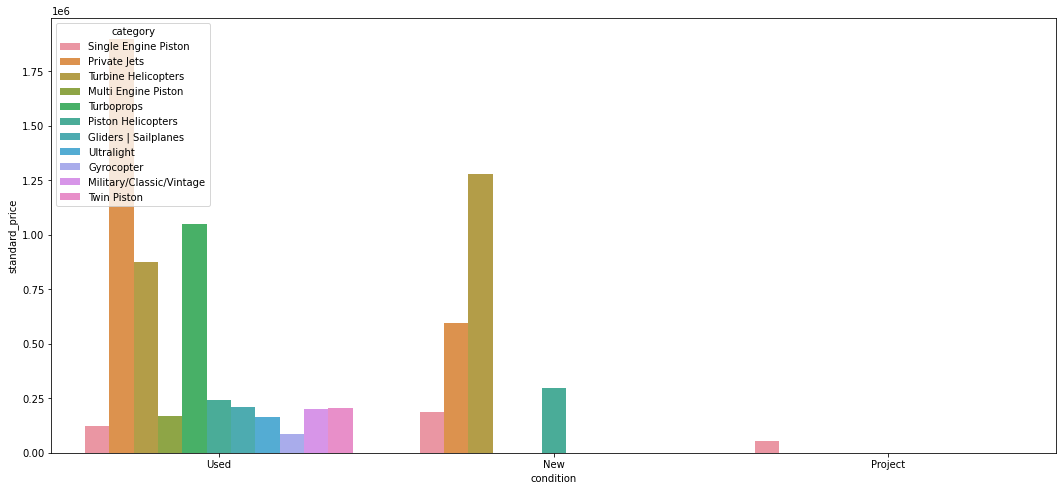

In [208]:
plt.figure(figsize = (18, 8))

sns.barplot(df['condition'], df['standard_price'], estimator = np.median, hue = df['category'], ci = False)

# there are more category in used airplane compared to new one
# there are only 1 category in project airplane
# used private jet have higher median price compared to the new one 
# while new turbine helicopter is more expensive compared to the new one 

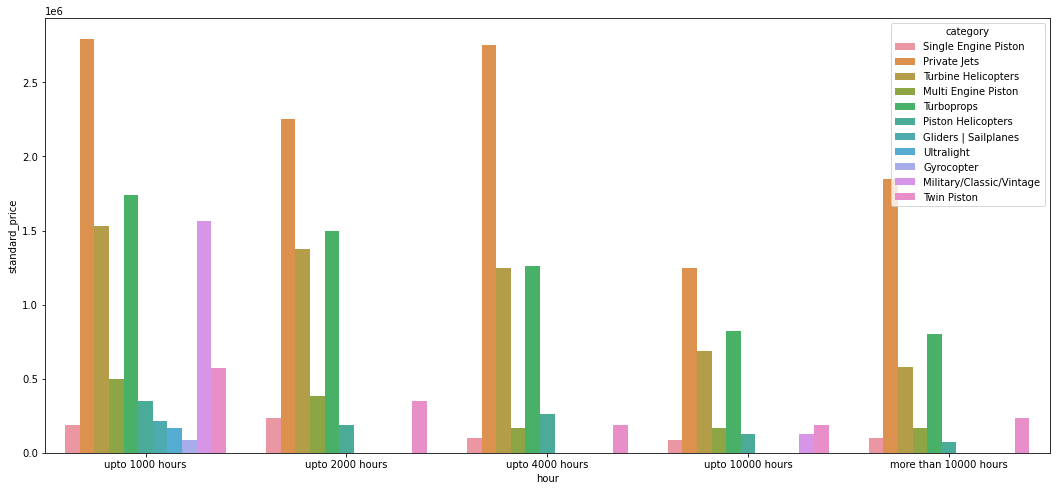

In [211]:
plt.figure(figsize = (18, 8))

sns.barplot(df['hour'], df['standard_price'], estimator = np.median, hue = df['category'], ci = False)

# for private jet it seems that the number of the hour doesn't really define the median prices of the plane
# in general we can see that price of plane per category tend to go lower as it's clock more hours 

### Insight 

- Majority of the plane in this dataset is from the USA 
- Plane price that's originally from outside USA are more expensive in every category 
- private jet has the highest median price compareed to other category 
- Used Private jet are suprisingly more expensive compared to the new one
- While for Turbine Helicopter the new median price are more expensive compared to the old one 
- total hours for private jet it seems doesnt affect much to it's prices 
- While for the rest of the airplane here the longer the total hour the price will tend to generally go down

In [212]:
## exporting for machine learning process 

df.to_csv('airplane_clean.csv', index = False)